In [23]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
np.random.seed(0)
N = 500 # number of points per class
D = 2 # input_size
K = 2 # class size

X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    m = np.random.random_integers(-100,100)
    n = np.random.random_integers(-100,100)
    X[ix] = [m,n]
    y[ix] = [m*n]

#initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))
            
            
# some hyperparameters
step_size = 1e-1
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
y = y.shape[0]
for i in range(10000):
  
  # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    
    #compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    loss = reg_loss
    if i % 10 == 0:
        print('iteration %d: loss %f' % (i, loss))
    
  # compute the gradient on scores
    dscores = probs 
    dscores[range(num_examples),y*100] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=1, keepdims=True)
  # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
  # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=1, keepdims=True)
  
  # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W
  
  # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
# evaluate training set accuracy
    hidden_layer = np.maximum(0, np.dot(X, W) + b)
    scores = np.dot(hidden_layer, W2) + b2
    predicted_class = np.argmax(scores, axis=1)
    print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))    

In [50]:
def random_Generator(low, high, num):
    xArr= np.random.random_integers(low, high, size = (num,1))
    yArr= np.random.random_integers(low, high, size = (num,1))
    inputAns = np.multiply(xArr,yArr)
    inputArr= np.concatenate((xArr, yArr), axis=1)

    inputArr = inputArr.astype(float)
    inputAns = inputAns.astype(float)
   
    for x in np.nditer(inputArr, op_flags=['readwrite']):
            x[...] = x/100

    for x in np.nditer(inputAns, op_flags=['readwrite']):
          x[...] = x/100
    
    return inputArr, inputAns 

In [77]:
np.random.seed(0)
N = 500 # number of points per class
D = 2 # input_size
K = 2 # class size

X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    m = np.random.random_integers(-100,100)
    n = np.random.random_integers(-100,100)
    X[ix] = [m,n]
    y[ix] = [m*n]

#X, y = random_Generator(-100,100,1000)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: DeprecationWarning: This function is deprecated. Please call randint(-100, 100 + 1) instead
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: This function is deprecated. Please call randint(-100, 100 + 1) instead


In [79]:
#initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))
            
            
# some hyperparameters
step_size = 1e-1
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
y = y.shape[0]
for i in range(10000):
  
  # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    
    #compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    loss = reg_loss
    if i % 10 == 0:
        print('iteration %d: loss %f' % (i, loss))
    
  # compute the gradient on scores
    dscores = probs 
    dscores[range(num_examples),y*100] -= 1
    dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=1, keepdims=True)
  # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
  # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=1, keepdims=True)
  
  # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W
  
  # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

IndexError: index 1000 is out of bounds for axis 1 with size 2

In [64]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.00


(-1, 1)

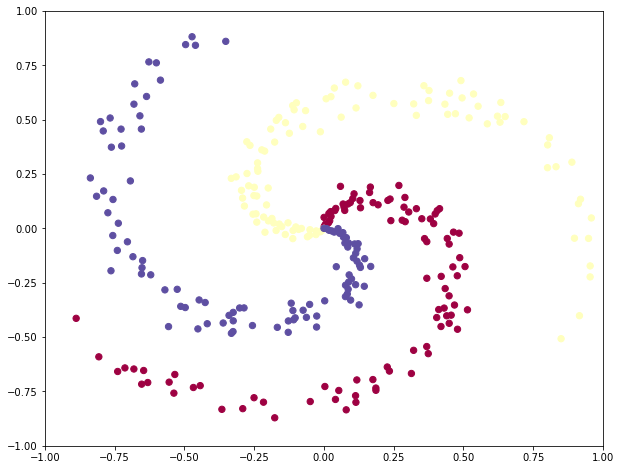

In [7]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')